## Importing the necessary python libraries to create the model
Call libraries that will help with the different stages of the model development like preprocessing, manipulation, feature engineering, model selection , training and evaluation etc

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## BLOCK 1 : Data Collection
We add the dataset to out notebook and get to see its composition and the different components of the dataset 

In [3]:
# Load the datasets
dftrain = pd.read_csv('./data/train_merged.csv')
dftest = pd.read_csv('./data/test_merged.csv') 

#Displays the first few rows of the training dataset
print(dftrain.head())

# Displays the first few rows of the test dataset
print(dftest.head())

# Displays the shape of the training and test datasets
print("Training dataset shape:", dftrain.shape)
print("Test dataset shape:", dftest.shape)

# Displays information about the training and test datasets
print("Training dataset info:")
print(dftrain.info())
print("Test dataset info:")
print(dftest.info())


/tmp/ipykernel_15731/3507040527.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dftrain = pd.read_csv('./data/train_merged.csv')
/tmp/ipykernel_15731/3507040527.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  dftest = pd.read_csv('./data/test_merged.csv')


   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                   

## Data cleaning
Converting the Null values to 0s for tree based models to understand 

In [4]:
# Places a 0 where the value is NaN in the training and the test datasets
dftrain.fillna(0, inplace=True)
dftest.fillna(0, inplace=True)
 
# Visualizes the dataset after replacing NaN values with 0
print("Training dataset after filling NaN values:")
print(dftrain.head())


Training dataset after filling NaN values:
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0               

In [5]:
# Data Preprocessing
# Convert categorical variables to numerical using one-hot encoding
dftrain = pd.get_dummies(dftrain, drop_first=True)
dftest = pd.get_dummies(dftest, drop_first=True)


#Aligning columns of both the training and test datasets to ensure they have the same columns
dftrain, dftest = dftrain.align(dftest, join='left', axis=1, fill_value=0)

#Visualizes the training dataset after one-hot encoding
print("Training dataset after one-hot encoding:")
print(dftrain.head())

# Visualizes the test dataset after one-hot encoding
print("Test dataset after one-hot encoding:")
print(dftest.head())


Training dataset after one-hot encoding:
   Store  DayOfWeek  Sales  Customers  Open  Promo  SchoolHoliday  \
0      1          5   5263        555     1      1              1   
1      2          5   6064        625     1      1              1   
2      3          5   8314        821     1      1              1   
3      4          5  13995       1498     1      1              1   
4      5          5   4822        559     1      1              1   

   CompetitionDistance  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0               1270.0                        9.0                    2008.0   
1                570.0                       11.0                    2007.0   
2              14130.0                       12.0                    2006.0   
3                620.0                        9.0                    2009.0   
4              29910.0                        4.0                    2015.0   

   ...  StateHoliday_b  StateHoliday_c  StoreType_b  StoreType_c  Sto

Training set shape: (813767, 965) (813767,)
Validation set shape: (203442, 965) (203442,)


Text(0.5, 1.0, 'Distribution of Sales in Training dataset')

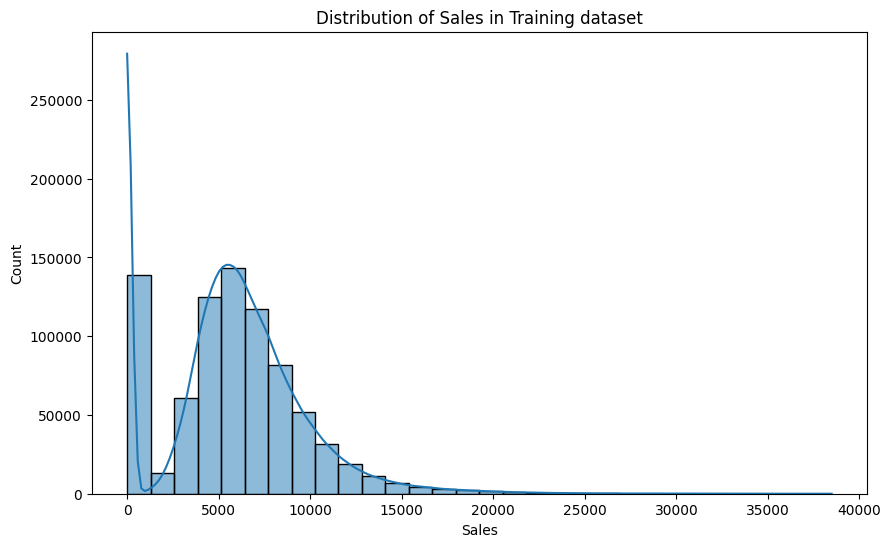

In [6]:
# Feature Selection
# Sales is the target variable
x = dftrain.drop(columns=['Sales'])
y = dftrain['Sales']

# Splitting the training dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.2, random_state=42)

# Displays the shapes of the training and validation sets
print("Training set shape:", x_train.shape, y_train.shape)
print("Validation set shape:", x_val.shape, y_val.shape)

# Visualizing the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(y_train, bins=30, kde=True)
plt.title('Distribution of Sales in Training dataset')
